In [14]:
import numpy as np

In [15]:
from scipy.optimize import least_squares
import matplotlib.pyplot as plt
from toy_datasets import ToyDatasets

In [40]:
class Stage1Algorithm():
  def __init__(self, num_elements):
    self.num_elements = num_elements
    self.A = None

  def objective(self, A, x, y):
    A = A.reshape(-1, 1)
    result = y - np.dot(A, x)
    result = np.square(np.linalg.norm(result))
    return result.flatten()
  
  def fit(self, x, y):
    A_initial_guess = np.array([0])
    A = least_squares(self.objective, A_initial_guess, args=(x, y))
    A = A.x.reshape(1, 1)
    self.A = A
  
  def predict(self, x):
    y_predicted = [0]
    y_predicted = np.dot(self.A, x)
    return y_predicted
  
  def evaluate(self, y, y_predicted):
    return np.sqrt(1/len(y) * np.sum(np.square(y - y_predicted)))

### Toy Data

In [41]:
num_elements = 100
toy_datasets = ToyDatasets(num_elements=num_elements)

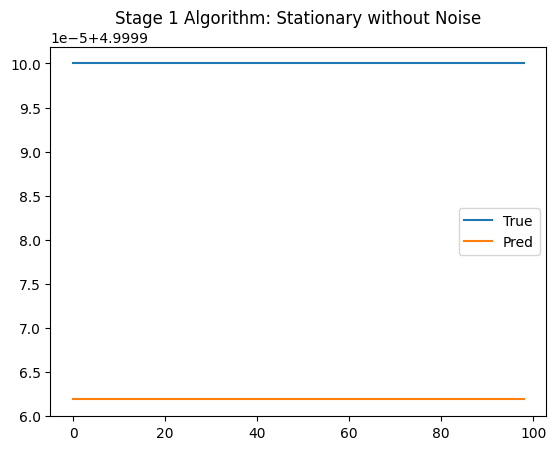

MSE:  0.0003791868070947653


In [42]:
np.random.seed(0)
toy_data = toy_datasets.stationary_without_noise(offset=5).reshape(-1, 1).T
x, y = toy_data[:, :-1], toy_data[:, 1:]
alg = Stage1Algorithm(num_elements=num_elements)
alg.fit(x, y)
plt.plot(y.flatten(), label="True")
y_predicted = alg.predict(x)
plt.plot(y_predicted.flatten(), label="Pred")
plt.title("Stage 1 Algorithm: Stationary without Noise")
plt.legend()
plt.show()
accuracy = alg.evaluate(y, y_predicted)
print("MSE: ", accuracy)

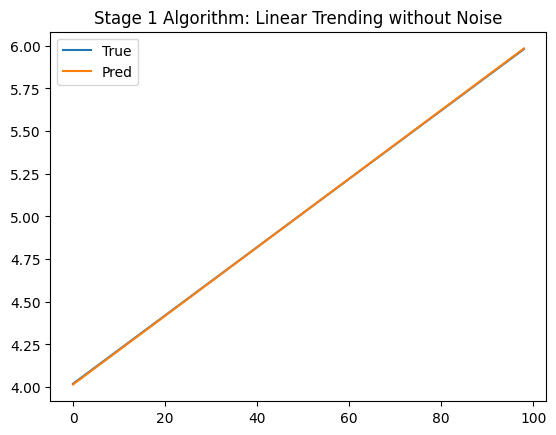

MSE:  0.022689718478867645


In [43]:
np.random.seed(0)
toy_data = toy_datasets.linear_trending_without_noise(m=2, offset=5).reshape(-1, 1).T
x, y = toy_data[:, :-1], toy_data[:, 1:]
alg = Stage1Algorithm(num_elements=num_elements)
alg.fit(x, y)
plt.plot(y.flatten(), label="True")
y_predicted = alg.predict(x)
plt.plot(y_predicted.flatten(), label="Pred")
plt.title("Stage 1 Algorithm: Linear Trending without Noise")
plt.legend()
plt.show()
accuracy = alg.evaluate(y, y_predicted)
print("MSE: ", accuracy)

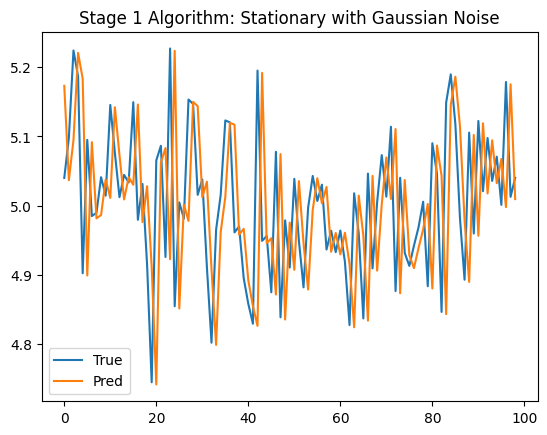

MSE:  1.3620319301602184


In [44]:
np.random.seed(0)
toy_data = toy_datasets.stationary_with_gaussian_noise().reshape(-1, 1).T
x, y = toy_data[:, :-1], toy_data[:, 1:]
alg.fit(x, y)
plt.plot(y.flatten(), label="True")
y_predicted = alg.predict(x)
plt.plot(y_predicted.flatten(), label="Pred")
plt.title("Stage 1 Algorithm: Stationary with Gaussian Noise")
plt.legend()
plt.show()
accuracy = alg.evaluate(y, y_predicted)
print("MSE: ", accuracy)

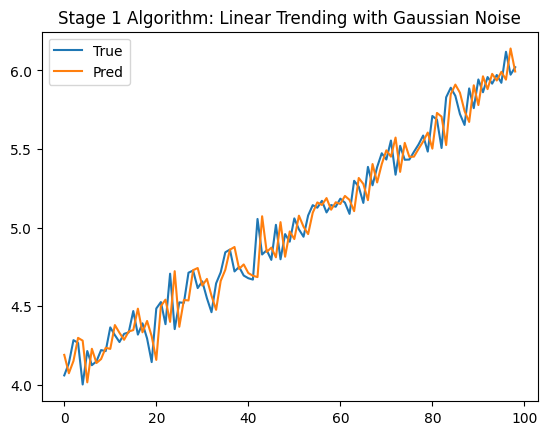

MSE:  1.3644306176871153


In [45]:
np.random.seed(0)
toy_data = toy_datasets.linear_trending_with_gaussian_noise().reshape(-1, 1).T
x, y = toy_data[:, :-1], toy_data[:, 1:]
alg.fit(x, y)
plt.plot(y.flatten(), label="True")
y_predicted = alg.predict(x)
plt.plot(y_predicted.flatten(), label="Pred")
plt.title("Stage 1 Algorithm: Linear Trending with Gaussian Noise")
plt.legend()
plt.show()
accuracy = alg.evaluate(y, y_predicted)
print("MSE: ", accuracy)